In [2]:
import Pkg; Pkg.activate(".")

  Activating project at `~/Code/ExperimentsPseudospectra.jl/notebook`


In [3]:
import Pkg; Pkg.add("Pseudospectra")

   Resolving package versions...
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Manifest-v1.11.toml`


In [4]:
using Pseudospectra

In [5]:
using LinearAlgebra

In [6]:
A = Diagonal([1.0; 2.0; 1.2; 3.0])+ 0.0001*rand(4, 4)

4×4 Matrix{Float64}:
 1.00004     2.61337e-5  4.1017e-6   4.09644e-5
 8.37255e-5  2.00001     9.82189e-5  2.69135e-5
 7.27552e-5  2.31263e-5  1.20005     6.97063e-5
 8.30028e-5  3.22296e-5  5.44355e-5  3.00002

In [7]:
"""
    new_matrix(A::AbstractMatrix, opts::Dict{Symbol,Any}=()) -> ps_data

process a matrix into the auxiliary data structure used by Pseudospectra.

# Options
- `:direct::Bool`: force use of a direct algorithm?
- `:keep_sparse::Bool`: use sparse matrix code even if `A` is not large?
- `:real_matrix::Bool`: treat `A` as unitarily equivalent to a real matrix?
- `:verbosity::Int`: obvious
- `:eigA`: eigenvalues of `A`, if already known
- `:proj_lev`: projection level (see `psa_compute`)
- `:npts`: edge length of grid for computing and plotting pseudospectra
- `:arpack_opts::ArpackOptions`: (see type description)
- `:levels::Vector{Real}`: contour levels (if automatic choice is not wanted)
- `:ax::Vector{Real}(4)`: bounding box for computation `[xmin,xmax,ymin,ymax]`
- `:scale_equal::Bool`: force isotropic axes for spectral portraits?
- `:threaded::Bool`: distribute `Z` values over Julia threads?
"""

"    new_matrix(A::AbstractMatrix, opts::Dict{Symbol,Any}=()) -> ps_data\n\nprocess a matrix into the auxiliary data structure used by Pseudospectra.\n\n# Options\n- `:direct::Bool`: force use of a direct algorithm?\n- `:keep_sparse::Bool`: use sparse matrix code even if `A` is" ⋯ 364 bytes ⋯ "Real}`: contour levels (if automatic choice is not wanted)\n- `:ax::Vector{Real}(4)`: bounding box for computation `[xmin,xmax,ymin,ymax]`\n- `:scale_equal::Bool`: force isotropic axes for spectral portraits?\n- `:threaded::Bool`: distribute `Z` values over Julia threads?\n"

In [8]:
import Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Manifest-v1.11.toml`


In [9]:
using Plots

In [10]:
opts = Dict{Symbol,Any}(:ax => [0.0; 4.0; -2.0; 2.0], :levels => [log10(x) for x in 0.1:0.1:10.0])

Dict{Symbol, Any} with 2 entries:
  :ax     => [0.0, 4.0, -2.0, 2.0]
  :levels => [-1.0, -0.69897, -0.522879, -0.39794, -0.30103, -0.221849, -0.1549…

In [11]:
ps_data = new_matrix(A, opts)

PSAStruct(ComplexF64[1.000035828357171 + 0.0im -4.2047671997849645e-5 + 0.0im 5.756555550119827e-5 + 0.0im -6.865584895071222e-5 + 0.0im; 0.0 + 0.0im 3.000015986835731 + 0.0im -5.313929408289419e-6 + 0.0im -1.5256511415203982e-5 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 2.000008897281705 + 0.0im -7.510845751417348e-5 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 1.2000492140332266 + 0.0im], ComplexF64[-0.9999999294883539 + 0.0im -4.150689561534249e-5 + 0.0im 8.370034151413452e-5 + 0.0im -0.0003637234069211145 + 0.0im; 8.369094556076405e-5 + 0.0im -2.6917020161745232e-5 + 0.0im 0.9999999957174782 + 0.0im 2.891960719927943e-5 + 0.0im; 0.0003637274331761553 + 0.0im -3.8719990491360467e-5 - 0.0im 2.8888122456618767e-5 + 0.0im -0.9999999326842939 + 0.0im; 4.149055653690503e-5 + 0.0im -0.9999999980267058 + 0.0im -2.692161278912672e-5 + 0.0im 3.8734306561230705e-5 + 0.0im], [1.0000358337358681 2.613374049648064e-5 4.1017001376565835e-6 4.09644362351826e-5; 8.372553879456195e-5 2.000008893121793 9.82189

In [12]:
setpsplotter(:Plots)

In [13]:
driver!(ps_data)

In [14]:
gs = defaultgs()

Pseudospectra.PseudospectraPlots.PlotsGUIState(Plot{Plots.GRBackend() n=2}, 0, Pseudospectra.PseudospectraPlots.dcinteractive, nothing, nothing, false, Any[], 0, false, true, "")

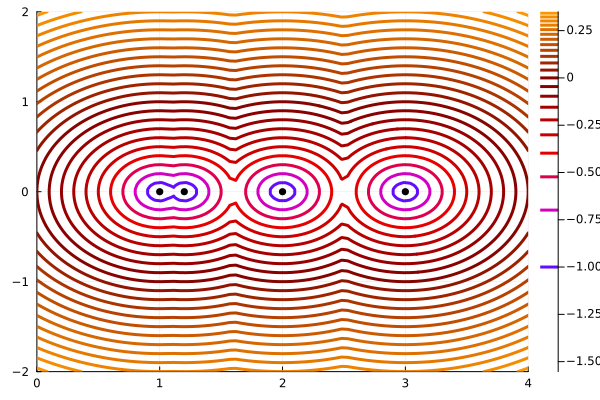

In [15]:
gs.mainph

In [19]:
savefig("Pseudospectrum_example.png")

"/home/isaia/Code/ExperimentsPseudospectra.jl/notebook/Pseudospectrum_example.png"

In [16]:
# psa_compute(T,npts,ax,eigA,opts,S=I) -> (Z,x,y,levels,info,Tproj,eigAproj,algo)

# Compute pseudospectra of a (decomposed) matrix.

# Uses a modified version of the code in [Trefethen1999]. If the matrix T is upper triangular (e.g. from a Schur decomposition) the solver is much more efficient than otherwise.

# Arguments

#     T: input matrix, usu. from schur()
#     npts: grid will have npts × npts nodes
#     ax: axis on which to plot [min_real, max_real, min_imag, max_imag]
#     eigA: eigenvalues of the matrix, usu. also produced by schur(). Pass an empty vector if unknown.
#     S: 2nd matrix, if this is a generalized problem arising from an original rectangular matrix.
#     opts: a Dict{Symbol,Any} holding options. Keys used here are as follows:

# Key	Type	Default	Description
# :levels	Vector{Real}	auto	log10(ϵ) for the desired ϵ levels
# :recompute_levels	Bool	true	automatically recompute ϵ levels?
# :real_matrix	Bool	eltype(A)<:Real	is the original matrix real? (Portrait is symmetric if so.) This is needed because T could be complex even if A was real.
# :proj_lev	Real	∞	The proportion by which to extend the axes in all directions before projection. If negative, exclude subspace of eigenvalues smaller than inverse fraction. ∞ means no projection.
# :scale_equal	Bool	false	force the grid to be isotropic?
# :threaded	Bool	false	distribute computation over Julia threads?

# Notes:

#     Projection is only done for square, dense matrices. Projection for sparse matrices may be handled (outside this function) by a Krylov method which reduces the matrix to a projected Hessenberg form before invoking psa_compute.
#     This function does not compute generalized pseudospectra per se. They may be handled by pre- and post-processing.

# Outputs:

#     Z: the singular values over the grid
#     x: the x coordinates of the grid lines
#     y: the y coordinates of the grid lines
#     levels: the levels used for the contour plot (if automatically calculated)
#     Tproj: the projected matrix (an alias to T if no projection was done)
#     eigAproj: eigenvalues projected onto
#     algo: a Symbol indicating which algorithm was used
#     info: flag indicating where automatic level creation fails:

# info	Meaning
# 0	No error
# -1	No levels in range specified (either manually, or if matrix is too normal to show levels)
# -2	Matrix is so non-normal that only zero singular values were found
# -3	Computation cancelled

In [17]:
Z,xs,ys,t_levels,err,Tproj,eigAproj,algo = psa_compute(A,npts,
                                                             zoom.ax,
                                                             eigA, opts
                                                            )

UndefVarError: UndefVarError: `npts` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [18]:
# function _portrait(xs,ys,Z,eigA)
#     p = plot()
#     contour!(p, xs,ys,log10.(Z))
#     scatter!(p, real(eigA), imag(eigA), color=:black, label="eigvals",
#              markersize=2)
#     p
# end